In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import os 
from utils.Plotter import Plotter
from model.SIFT import SIFTDetector

In [3]:
# path to the compressed ROL dataset
path_rol_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_compressed" 
# path to the extracted images similar ROL dataset
path_sim_rol_extract_nn_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed"
path_sift_sim_rol = "C:/Cours-Sorbonne/M1/Stage/src/params/sim_rol" 


In [4]:

img_matched_1 = cv2.imread(f"{path_sim_rol_extract_nn_comp}/bpt6k4627016t_f3_04_0.944.jpg"),
img_matched_2 = cv2.imread(f"{path_sim_rol_extract_nn_comp}/bpt6k11964145_f1_01_0.996.jpg"),
img_matched_3 = cv2.imread(f"{path_sim_rol_extract_nn_comp}/bd6t512924998_f5_01_0.998.jpg"),

img_rol = [cv2.imread(f"{path_sim_rol_extract_nn_comp}/{img}") for img in os.listdir(path_sim_rol_extract_nn_comp)]
img_to_match = "btv1b6904667b"
img_simlaire = cv2.imread(os.path.join(path_rol_comp, img_to_match + ".jpg"))

In [5]:
# img_rol.extend([img_simlaire])
# img_tiltes = [f"Image {i}" for i in range(1, len(img_rol)+1)]
# Plotter.plot_images(img_rol, img_tiltes, fig_size=(20,15))
# temp = img_rol.pop()

In [6]:
all_keypoints_descriptors = SIFTDetector.loadSIFTDescriptors(path_sift_sim_rol, len(img_rol))

100%|██████████| 6480/6480 [03:23<00:00, 31.81it/s]


In [7]:
# all_keypoints_descriptors = [SIFTDetector.computeSIFT(img) for img in img_rol]
all_keypoints_descriptors_filtered = [img for img in all_keypoints_descriptors if img[1] is not None]

In [8]:
len(all_keypoints_descriptors_filtered), len(all_keypoints_descriptors)

(6479, 6479)

In [9]:
# SIFTDetector.saveSIFTDescriptors(all_keypoints_descriptors, path_sift_sim_rol)
keypoints, descriptors = SIFTDetector.computeSIFT(img_simlaire)

In [10]:
best_matchs = SIFTDetector.getBestMatch(descriptors, [kp_des[1] for kp_des in all_keypoints_descriptors_filtered])

6479it [19:17,  5.60it/s]


In [11]:
len(best_matchs)

6479

In [12]:
nb_best_match = 3

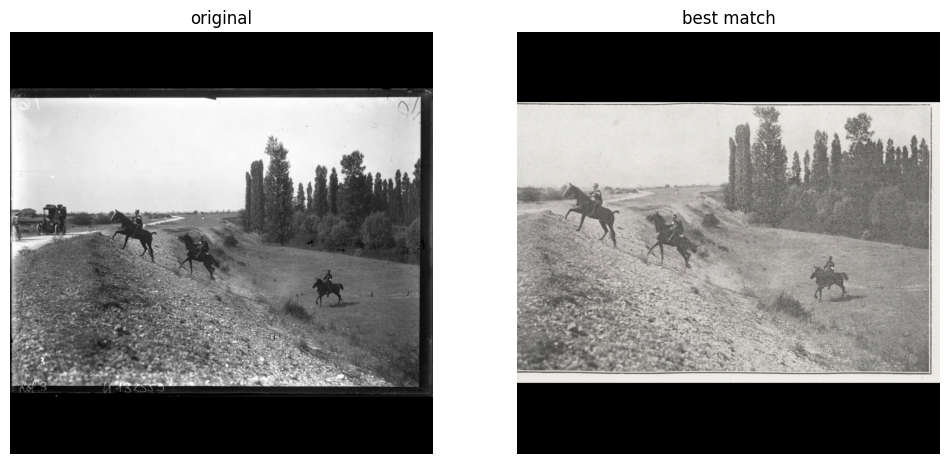

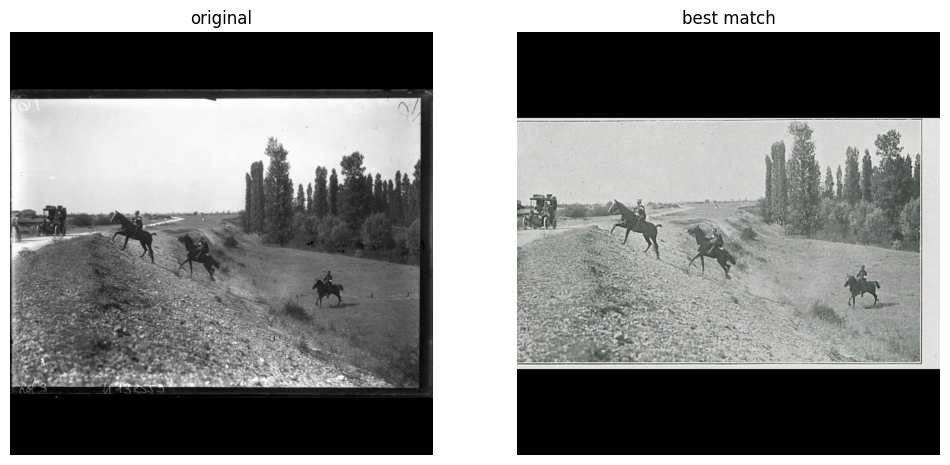

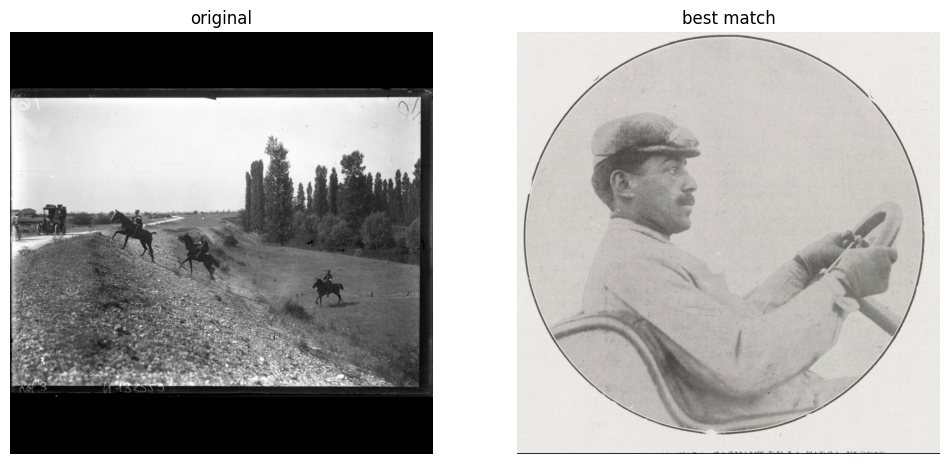

In [13]:
all_img_best = []
for best_match_img_index, best_match_len_good_kp, best_match_good_kp in best_matchs[:nb_best_match]:
    img_best = img_rol[best_match_img_index]
    all_img_best.append(img_best)
    Plotter.plot_compare(img_simlaire, img_best, "original", "best match")

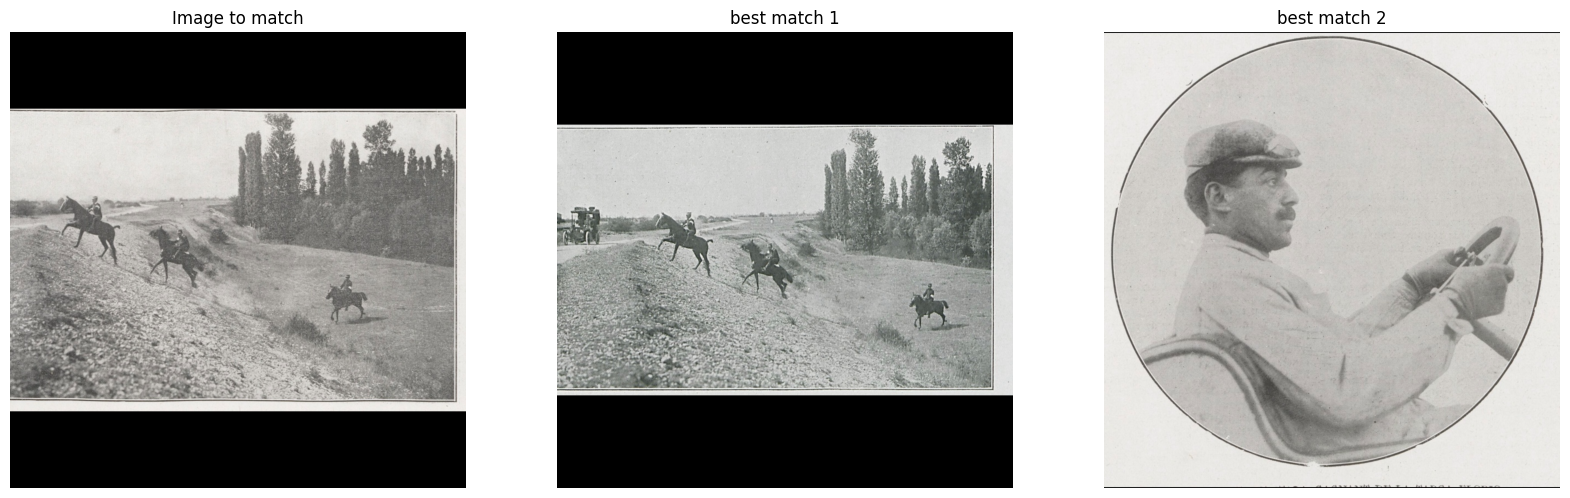

In [14]:
# all_img_best.insert(0, img_simlaire)
Plotter.plot_images(all_img_best, ["Image to match", "best match 1", "best match 2", "best match 3"], fig_size=(20,15))

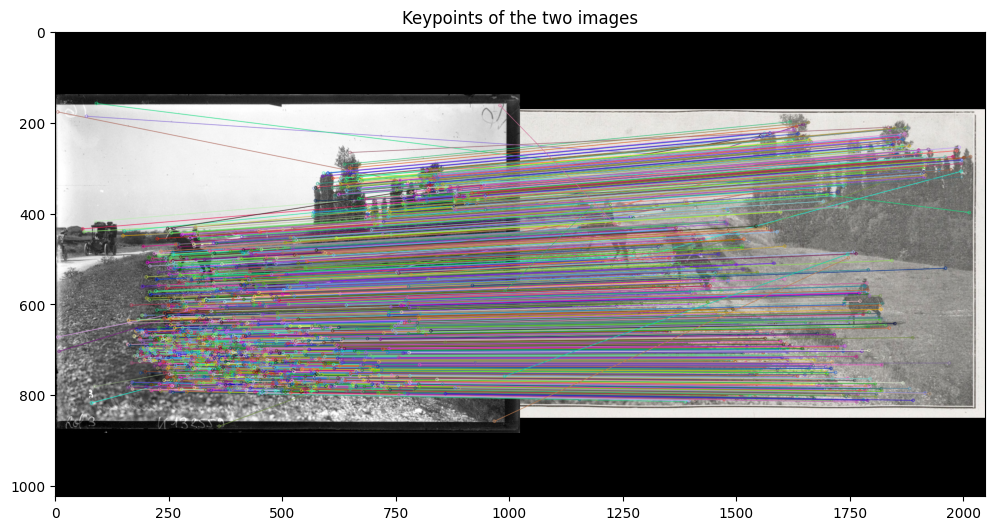

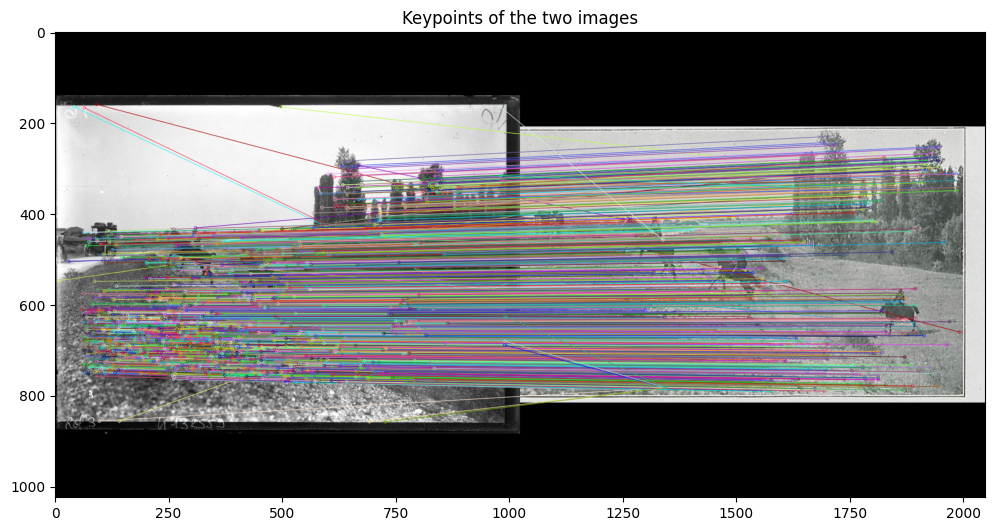

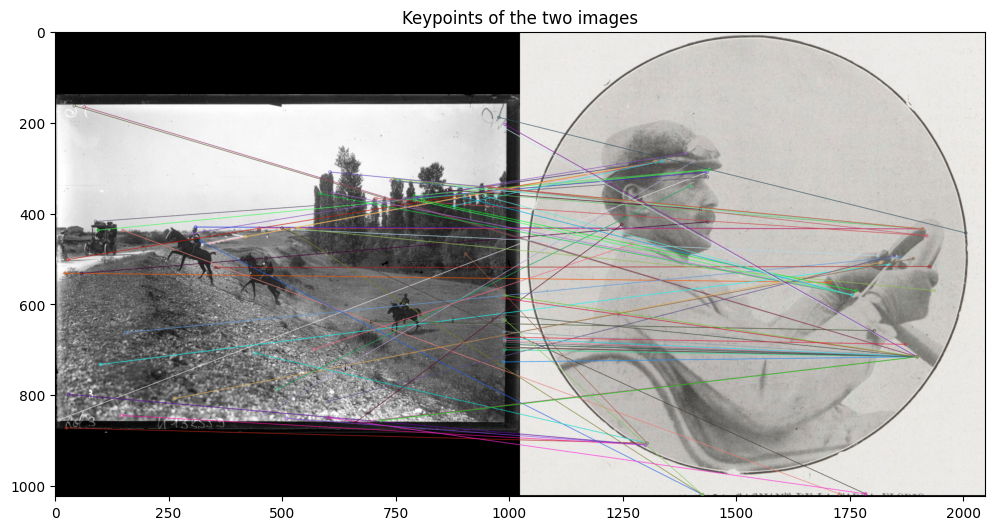

In [15]:
for best_match_img_index, best_match_len_good_kp, best_match_good_kp in best_matchs[:nb_best_match]:
    img_best = img_rol[best_match_img_index]
    img_best_kp = SIFTDetector.computeSIFT(img_best)[0]
    SIFTDetector.displayKeypoints(img_simlaire, keypoints, img_best, img_best_kp, best_match_good_kp)